## Part1: For this project, you should look at requests with Request Type of "COVID-19" and Subrequest Type of "COVID-19 Violations". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

%matplotlib inline

In [2]:
# to see all columns
pd.set_option('display.max_columns', None)

### Using the csv file:

In [ ]:
#hubNash = pd.read_csv("../data/hubNashville__311__Service_Requests.csv")

In [ ]:
#covid19 = hubNash[(hubNash["Request Type"] == "COVID-19") & hubNash["Subrequest Type"].str.contains("COVID-19 Violations")]

### Using Json files:

In [3]:
#getting data from API, case_requests = COVID-19 and setting limit to 25k

url = 'https://data.nashville.gov/resource/7qhx-rexh.json?case_request=COVID-19&$limit=25000'

response = requests.get(url)

In [4]:
#reading the json text to dataframe

hubNashville = pd.read_json(response.text)

In [5]:
#subsetting for case_request and case_subrequest

covid19 = hubNashville[hubNashville["case_subrequest"] == "COVID-19 Violations"]

In [6]:
covid19.shape

(11676, 19)

In [7]:
covid19.head()

,additional_subrequest,case_number,case_origin,case_request,case_subrequest,closed_when_created,contact_type,date_time_closed,date_time_opened,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,mapped_location,parent_case,state_issue,status
1,COVID-19 Violations,497626,hubNashville Community,COVID-19,COVID-19 Violations,False,NaN,NaN,2020-11-07T05:07:43.000,1531 Broadway,NASHVILLE,19.0,37203.0,36.154065,-86.792344,"{'latitude': '36.1540647', 'longitude': '-86.7...",NaN,False,New
2,COVID-19 Violations,496725,hubNashville Community,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:42:04.000,2020-11-06T02:05:43.000,401 Union St,NASHVILLE,19.0,37219.0,36.164800,-86.779929,"{'latitude': '36.16480010000001', 'longitude':...",NaN,False,Closed
5,COVID-19 Violations,496741,hubNashville Community,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:35:14.000,2020-11-06T04:19:04.000,81 Van Buren St,NASHVILLE,19.0,37208.0,36.181791,-86.784818,"{'latitude': '36.181790734428645', 'longitude'...",NaN,False,Closed
6,COVID-19 Violations,496042,Phone,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:38:31.000,2020-11-05T16:18:39.000,3204 Gallatin Pike,NASHVILLE,7.0,37216.0,36.205640,-86.735940,"{'latitude': '36.20564', 'longitude': '-86.735...",NaN,False,Closed
9,COVID-19 Violations,496441,Phone,COVID-19,COVID-19 Violations,False,NaN,2020-11-06T14:41:16.000,2020-11-05T20:30:58.000,1716 Charlotte Ave,NASHVILLE,19.0,37203.0,36.158400,-86.799650,"{'latitude': '36.1584', 'longitude': '-86.79965'}",NaN,False,Closed


In [8]:
#drop columns
covid19 = covid19.drop(columns = ["additional_subrequest", "case_request","case_subrequest", "case_origin", "mapped_location", "parent_case"], axis = 1)

In [9]:
covid19.head()

,case_number,closed_when_created,contact_type,date_time_closed,date_time_opened,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,state_issue,status
1,497626,False,NaN,NaN,2020-11-07T05:07:43.000,1531 Broadway,NASHVILLE,19.0,37203.0,36.154065,-86.792344,False,New
2,496725,False,NaN,2020-11-06T14:42:04.000,2020-11-06T02:05:43.000,401 Union St,NASHVILLE,19.0,37219.0,36.164800,-86.779929,False,Closed
5,496741,False,NaN,2020-11-06T14:35:14.000,2020-11-06T04:19:04.000,81 Van Buren St,NASHVILLE,19.0,37208.0,36.181791,-86.784818,False,Closed
6,496042,False,NaN,2020-11-06T14:38:31.000,2020-11-05T16:18:39.000,3204 Gallatin Pike,NASHVILLE,7.0,37216.0,36.205640,-86.735940,False,Closed
9,496441,False,NaN,2020-11-06T14:41:16.000,2020-11-05T20:30:58.000,1716 Charlotte Ave,NASHVILLE,19.0,37203.0,36.158400,-86.799650,False,Closed


In [10]:
covid19.shape

(11676, 13)

### Convert the time

In [11]:
# Converting the original date column from string to datetime
covid19["date_opened"] = covid19["date_time_opened"].astype("datetime64")

covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676 entries, 1 to 15999
Data columns (total 14 columns):
case_number                  11676 non-null int64
closed_when_created          11676 non-null object
contact_type                 46 non-null object
date_time_closed             11646 non-null object
date_time_opened             11676 non-null object
incident_address             11400 non-null object
incident_city                10694 non-null object
incident_council_district    10727 non-null float64
incident_zip_code            10759 non-null float64
latitude                     11398 non-null float64
longitude                    11398 non-null float64
state_issue                  11676 non-null object
status                       11676 non-null object
date_opened                  11676 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 1.3+ MB


In [12]:
covid19['month_opened'] = covid19['date_opened'].dt.month
covid19['day_opened'] = covid19['date_opened'].dt.day
covid19['time_opened'] = covid19['date_opened'].dt.time

covid19.head()

,case_number,closed_when_created,contact_type,date_time_closed,date_time_opened,incident_address,incident_city,incident_council_district,incident_zip_code,latitude,longitude,state_issue,status,date_opened,month_opened,day_opened,time_opened
1,497626,False,NaN,NaN,2020-11-07T05:07:43.000,1531 Broadway,NASHVILLE,19.0,37203.0,36.154065,-86.792344,False,New,2020-11-07 05:07:43,11,7,05:07:43
2,496725,False,NaN,2020-11-06T14:42:04.000,2020-11-06T02:05:43.000,401 Union St,NASHVILLE,19.0,37219.0,36.164800,-86.779929,False,Closed,2020-11-06 02:05:43,11,6,02:05:43
5,496741,False,NaN,2020-11-06T14:35:14.000,2020-11-06T04:19:04.000,81 Van Buren St,NASHVILLE,19.0,37208.0,36.181791,-86.784818,False,Closed,2020-11-06 04:19:04,11,6,04:19:04
6,496042,False,NaN,2020-11-06T14:38:31.000,2020-11-05T16:18:39.000,3204 Gallatin Pike,NASHVILLE,7.0,37216.0,36.205640,-86.735940,False,Closed,2020-11-05 16:18:39,11,5,16:18:39
9,496441,False,NaN,2020-11-06T14:41:16.000,2020-11-05T20:30:58.000,1716 Charlotte Ave,NASHVILLE,19.0,37203.0,36.158400,-86.799650,False,Closed,2020-11-05 20:30:58,11,5,20:30:58


In [13]:
covid19["month_opened"].unique()

array([11, 10,  8,  9,  7,  4,  3,  5,  6])

In [14]:
covid19["month_day_opened"] = covid19['date_opened'].dt.strftime('%m-%d') # from Taylor

In [15]:
# drop "date_time_opened"
covid19 = covid19.drop(columns = ["date_time_opened"], axis = 1)

In [16]:
# NB: there is missing values and this is why I can't convert the closed dates in integer (can't if Nan values) but I shouldn't need it for the project
#covid19[["month_closed", "day_closed"]] = covid19[["month_closed", "day_closed"]].apply(pd.to_numeric)
#covid19.info()

In [17]:
covid19.shape

(11676, 17)

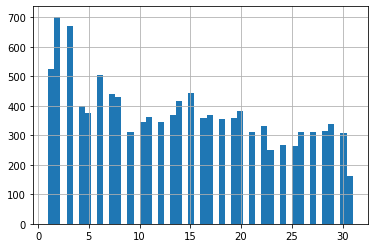

In [28]:
covid19['day_opened'].hist(bins = 50);

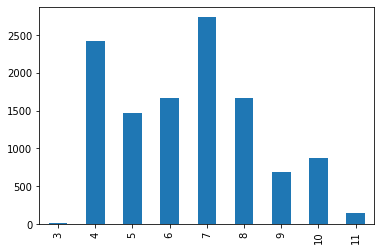

In [20]:
covid19['month_opened'].value_counts().sort_index().plot(kind="bar");

### Convert the location into a geodata point

In [ ]:
#import geopandas as gpd
#covid19 = gpd.GeoDataFrame(
#            covid19, geometry=gpd.points_from_xy(covid19.longitude, covid19.latitude))